-  Indivisuals all around the world in some way depend on banks to lend them bank for various reasons to help them overcome there financial constraints and achieve some personal goals.

-  Loan is the major source of income for the banking sector as well as the biggest source of financial risk for banks. 

- In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.

- To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was “charged off,” meaning the borrower was deemed unlikely to ever pay it back).

- To predict this dependent variable, we will use the following independent variables available to the investor when deciding whether to fund a loan:

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


- credit.policy:- 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose:- The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate:- The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment:- The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc:- The natural log of the self-reported annual income of the borrower.
- dti:- The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico:- The FICO credit score of the borrower.
- days.with.cr.line:- The number of days the borrower has had a credit line.
- revol.bal:- The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util:- The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths:- The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs:- The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec:- The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [3]:
#TO check the shape of the DataSet:-

df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#Finding null values columns:-

df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
# Drop unnecessary Coulmn:-

df.drop("purpose",axis=1,inplace=True)
#df.head()

In [8]:
# Change Columns Names:-

df.rename({"credit.policy":"CreditPolicy","int.rate":"InterestRate","installment":"Installment","log.annual.inc":"AnnualIncome",
           "dti":"Debt-To-Income","fico":"CreditScore","days.with.cr.line":"DaysCreditLine","revol.bal":"Revolving Balance",
           "revol.util":"Revolving Line Utilization Rate","inq.last.6mths":"Inquiries By Creditors","delinq.2yrs":"Due Payment Past 2Years",
           "pub.rec":"Derogatory Public Records","not.fully.paid":"Loan Status"}, axis=1, inplace  = True)

In [9]:
df.head()

,CreditPolicy,InterestRate,Installment,AnnualIncome,Debt-To-Income,CreditScore,DaysCreditLine,Revolving Balance,Revolving Line Utilization Rate,Inquiries By Creditors,Due Payment Past 2Years,Derogatory Public Records,Loan Status
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
df["CreditPolicy"].value_counts()

1    7710
0    1868
Name: CreditPolicy, dtype: int64

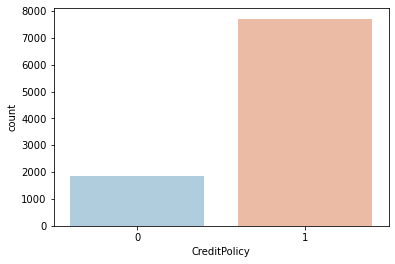

In [11]:
#EDA:-

sns.countplot(x="CreditPolicy",data=df,palette='RdBu_r')
plt.show()

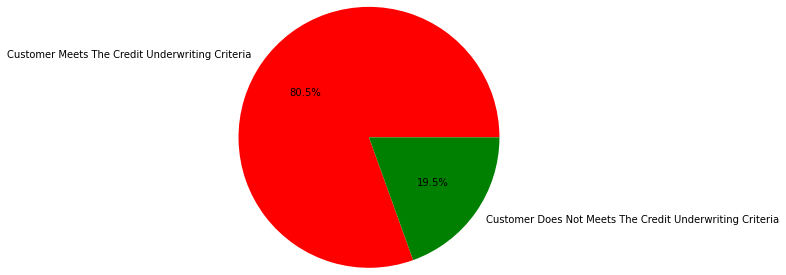

In [19]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['CreditPolicy'].value_counts(), labels=['Customer Meets The Credit Underwriting Criteria','Customer Does Not Meets The Credit Underwriting Criteria'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

In [12]:
df["Loan Status"].value_counts()

0    8045
1    1533
Name: Loan Status, dtype: int64

- There are 8045 person who did'nt pay loan amount, Where 1533 who paid loan amount.

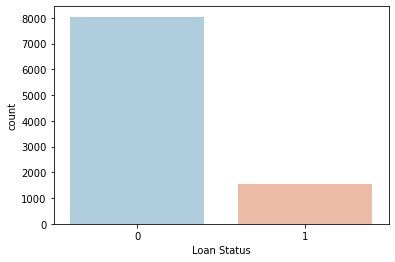

In [13]:
##EDA:-

sns.countplot(x="Loan Status",data=df,palette='RdBu_r')
plt.show()

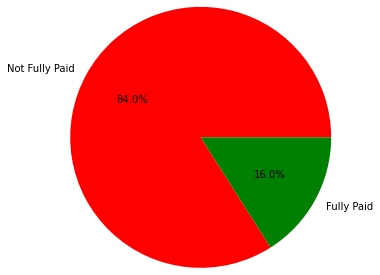

In [18]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['Loan Status'].value_counts(), labels=['Not Fully Paid','Fully Paid'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

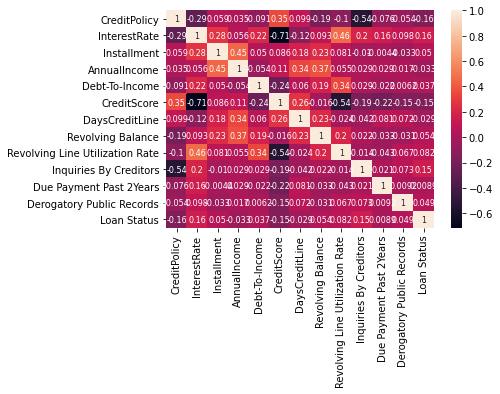

In [14]:
# To check the correlation with the help of Heatmap:-

sns.heatmap(df.corr(), annot =True,annot_kws={"fontsize":8})
plt.show()

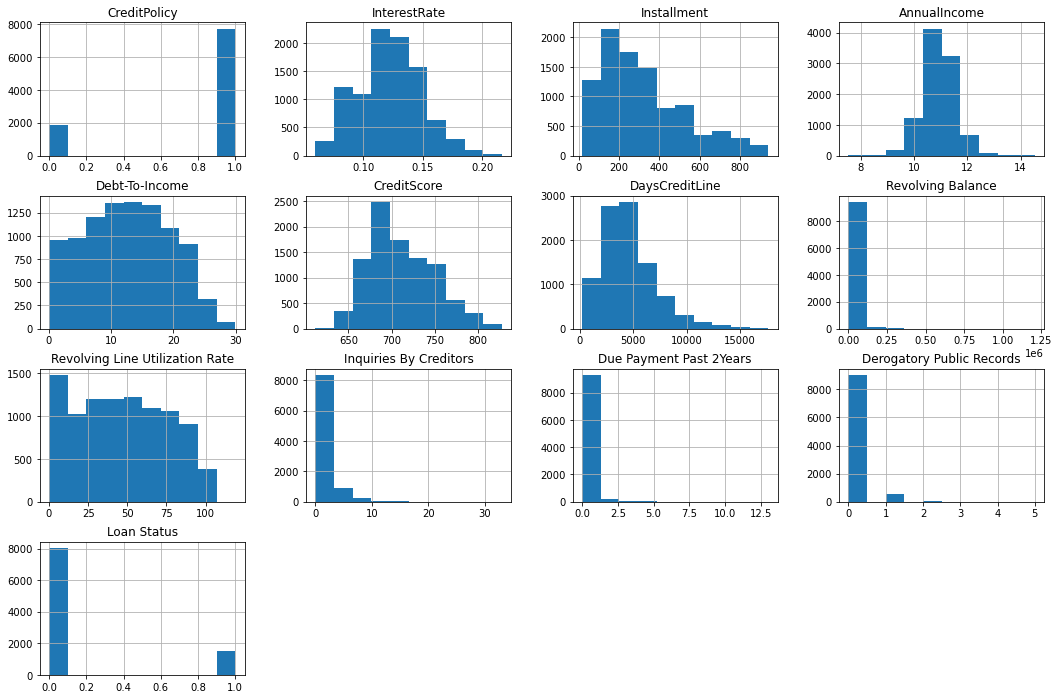

In [15]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

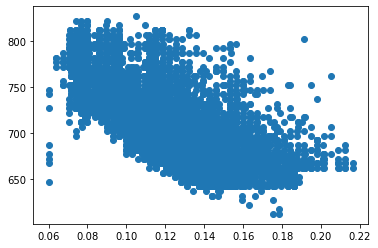

In [16]:
plt.scatter(data=df,x="InterestRate",y="CreditScore")
plt.show()

# Separation of X and Y.

In [21]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [26]:
mymodel(logreg)

Accuracy :- 0.8405010438413362
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.40      0.01      0.01       381

    accuracy                           0.84      2395
   macro avg       0.62      0.50      0.46      2395
weighted avg       0.77      0.84      0.77      2395

[[2011    3]
 [ 379    2]]


LogisticRegression()

In [27]:
mymodel(knn)

Accuracy :- 0.8254697286012526
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2014
           1       0.28      0.06      0.10       381

    accuracy                           0.83      2395
   macro avg       0.56      0.52      0.50      2395
weighted avg       0.76      0.83      0.78      2395

[[1953   61]
 [ 357   24]]


KNeighborsClassifier()

In [28]:
mymodel(svc)

Accuracy :- 0.8409185803757829
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.00      0.00      0.00       381

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395

[[2014    0]
 [ 381    0]]


SVC()

In [29]:
mymodel(dtc)

Accuracy :- 0.7356993736951983
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2014
           1       0.24      0.30      0.26       381

    accuracy                           0.74      2395
   macro avg       0.55      0.56      0.55      2395
weighted avg       0.76      0.74      0.75      2395

[[1649  365]
 [ 268  113]]


DecisionTreeClassifier()

In [30]:
mymodel(rfc)

Accuracy :- 0.8405010438413362
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.48      0.03      0.05       381

    accuracy                           0.84      2395
   macro avg       0.66      0.51      0.48      2395
weighted avg       0.79      0.84      0.78      2395

[[2003   11]
 [ 371   10]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Loan DataSet is Logistic Regression, Support Vector Classifier OR Random Forest Classifier have same accuracy.

. BEST SCORES 
-  LOGISTIC REGRESSION HAVE 84% OF ACCURACY.
-  RANDOM FOREST CLASSIFIER HAVE 84% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 84% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 83% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 74% OF ACCURACY.